# Player Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [2]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [3]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [4]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','dl_applied','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs','penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 26)

In [5]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,2,0,0,0,0,0,2,2,NaN,NaN


## Taking in consideration KXIP VS RR matches

In [6]:
KXIP_RR= matches[np.logical_or(np.logical_and(matches['team1']=='Kings XI Punjab',matches['team2']=='Rajasthan Royals'),
                            np.logical_and(matches['team2']=='Kings XI Punjab',matches['team1']=='Rajasthan Royals'))]
KXIP_RR = KXIP_RR[KXIP_RR["dl_applied"]==0]

In [7]:
KXIP_RR.match_id.nunique()

19

In [8]:
KXIP_RR.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019],
      dtype=int64)

## Player to have ratio better


- Sanju Samson

In [67]:
samson = KXIP_RR[(KXIP_RR["batting_team"]=="Rajasthan Royals")&(KXIP_RR["batsman"]=="SV Samson")]

samson.iloc[:,4:].head()

,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
94296,Rajasthan Royals,field,0,Rajasthan Royals,2,Rajasthan Royals,Kings XI Punjab,13,6,SV Samson,...,0,0,0,0,0,0,0,0,NaN,NaN
94298,Rajasthan Royals,field,0,Rajasthan Royals,2,Rajasthan Royals,Kings XI Punjab,14,2,SV Samson,...,0,0,0,0,0,4,0,4,NaN,NaN
94299,Rajasthan Royals,field,0,Rajasthan Royals,2,Rajasthan Royals,Kings XI Punjab,14,3,SV Samson,...,0,0,0,0,0,1,0,1,NaN,NaN
94301,Rajasthan Royals,field,0,Rajasthan Royals,2,Rajasthan Royals,Kings XI Punjab,14,5,SV Samson,...,0,0,0,0,0,1,0,1,NaN,NaN
94304,Rajasthan Royals,field,0,Rajasthan Royals,2,Rajasthan Royals,Kings XI Punjab,15,2,SV Samson,...,0,0,0,0,0,0,0,0,NaN,NaN


In [68]:
samson_runs= samson[samson["wide_runs"]==0]

batsman_runs11 = samson_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})

batsman_runs11

,batsman_runs,ball
match_id,,
398,27,23
436,47,33
464,52,34
509,30,29
520,5,6
536,5,2
7931,29,23
7933,23,18
11140,30,25


In [69]:
samson_runs.batsman_runs.unique()

array([0, 4, 1, 2, 6, 3], dtype=int64)

In [70]:
samson_boundaries = samson_runs[(samson_runs["batsman_runs"]==4)|(samson_runs["batsman_runs"]==6)]

boundary_runs11 = pd.DataFrame(samson_boundaries.groupby(["match_id"])["batsman_runs"].sum())

boundary_runs11.columns = ["boundary runs"]

boundary_runs11

,boundary runs
match_id,
398,12
436,26
464,36
509,14
536,4
7931,14
7933,10
11140,6
11323,8


In [71]:
samson_ratio = pd.merge(batsman_runs11,boundary_runs11, on = "match_id" , how = "outer")

samson_ratio["boundary runs"].fillna(0, inplace = True)

samson_ratio = samson_ratio[samson_ratio["ball"]>10]

samson_ratio

,batsman_runs,ball,boundary runs
match_id,,,
398,27,23,12.0
436,47,33,26.0
464,52,34,36.0
509,30,29,14.0
7931,29,23,14.0
7933,23,18,10.0
11140,30,25,6.0
11323,27,21,8.0


In [72]:
samson_ratio["ratio"] = (samson_ratio["boundary runs"]/samson_ratio["batsman_runs"])

samson_ratio

,batsman_runs,ball,boundary runs,ratio
match_id,,,,
398,27,23,12.0,0.444444
436,47,33,26.0,0.553191
464,52,34,36.0,0.692308
509,30,29,14.0,0.466667
7931,29,23,14.0,0.482759
7933,23,18,10.0,0.434783
11140,30,25,6.0,0.200000
11323,27,21,8.0,0.296296


In [73]:
samson_final_ratio = sum(samson_ratio["ratio"]/len(samson_ratio["ratio"]))

print("Average ratio for Samson :",round(samson_final_ratio*100))

Average ratio for Samson : 45


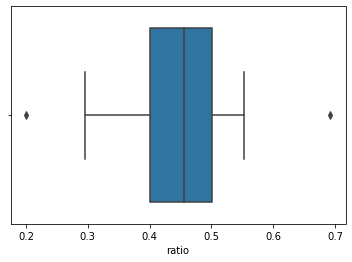

In [74]:
sns.boxplot(samson_ratio["ratio"])

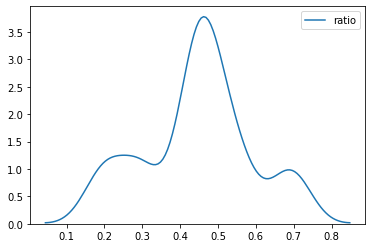

In [75]:
sns.kdeplot(samson_ratio["ratio"])

- KL Rahul

In [125]:
rahul = KXIP_RR[(KXIP_RR["batting_team"]=="Kings XI Punjab")&(KXIP_RR["batsman"]=="KL Rahul")]

rahul.iloc[:,4:].head()

,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
159362,Kings XI Punjab,field,0,Kings XI Punjab,2,Kings XI Punjab,Rajasthan Royals,1,1,KL Rahul,...,0,0,0,0,0,1,0,1,NaN,NaN
159368,Kings XI Punjab,field,0,Kings XI Punjab,2,Kings XI Punjab,Rajasthan Royals,2,1,KL Rahul,...,0,0,0,0,0,0,0,0,NaN,NaN
159369,Kings XI Punjab,field,0,Kings XI Punjab,2,Kings XI Punjab,Rajasthan Royals,2,2,KL Rahul,...,0,0,0,0,0,1,0,1,NaN,NaN
159374,Kings XI Punjab,field,0,Kings XI Punjab,2,Kings XI Punjab,Rajasthan Royals,3,1,KL Rahul,...,0,0,0,0,0,4,0,4,NaN,NaN
159375,Kings XI Punjab,field,0,Kings XI Punjab,2,Kings XI Punjab,Rajasthan Royals,3,2,KL Rahul,...,0,0,0,0,0,0,0,0,NaN,NaN


In [126]:
rahul_runs= rahul[rahul["wide_runs"]==0]

batsman_runs12 = rahul_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})

batsman_runs12

,batsman_runs,ball
match_id,,
7931,84,54
7933,101,70
11140,4,4
11323,53,47


In [127]:
rahul_runs.batsman_runs.unique()

array([1, 0, 4, 2, 6], dtype=int64)

In [128]:
rahul_boundaries = rahul_runs[(rahul_runs["batsman_runs"]==4)|(rahul_runs["batsman_runs"]==6)]

boundary_runs12 = pd.DataFrame(rahul_boundaries.groupby(["match_id"])["batsman_runs"].sum())

boundary_runs12.columns = ["boundary runs"]

boundary_runs12

,boundary runs
match_id,
7931,46
7933,60
11140,4
11323,24


In [129]:
rahul_ratio = pd.merge(batsman_runs12,boundary_runs12, on = "match_id" , how = "outer")

rahul_ratio = rahul_ratio[rahul_ratio["ball"]>10]

rahul_ratio

,batsman_runs,ball,boundary runs
match_id,,,
7931,84,54,46
7933,101,70,60
11323,53,47,24


In [130]:
rahul_ratio["ratio"] = (rahul_ratio["boundary runs"]/rahul_ratio["batsman_runs"])

rahul_ratio

,batsman_runs,ball,boundary runs,ratio
match_id,,,,
7931,84,54,46,0.547619
7933,101,70,60,0.594059
11323,53,47,24,0.452830


In [131]:
rahul_final_ratio = sum(rahul_ratio["ratio"]/len(rahul_ratio["ratio"]))

print("Average ratio for Rahul :",round(rahul_final_ratio*100))

Average ratio for Rahul : 53


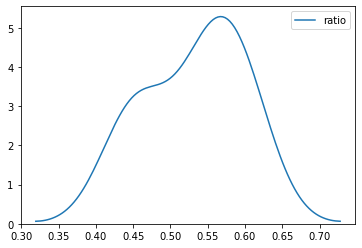

In [132]:
sns.kdeplot(rahul_ratio["ratio"])

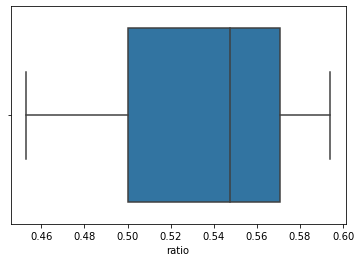

In [133]:
sns.boxplot(rahul_ratio["ratio"])

- Chris Gayle

In [134]:
gayle = KXIP_RR[(KXIP_RR["batting_team"]=="Kings XI Punjab")&(KXIP_RR["batsman"]=="CH Gayle")]

gayle.iloc[:,4:].head()

,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
159363,Kings XI Punjab,field,0,Kings XI Punjab,2,Kings XI Punjab,Rajasthan Royals,1,2,CH Gayle,...,0,0,0,0,0,0,0,0,NaN,NaN
159364,Kings XI Punjab,field,0,Kings XI Punjab,2,Kings XI Punjab,Rajasthan Royals,1,3,CH Gayle,...,0,0,0,0,0,0,0,0,NaN,NaN
159365,Kings XI Punjab,field,0,Kings XI Punjab,2,Kings XI Punjab,Rajasthan Royals,1,4,CH Gayle,...,0,0,0,0,0,0,0,0,NaN,NaN
159366,Kings XI Punjab,field,0,Kings XI Punjab,2,Kings XI Punjab,Rajasthan Royals,1,5,CH Gayle,...,0,0,0,0,0,0,0,0,NaN,NaN
159367,Kings XI Punjab,field,0,Kings XI Punjab,2,Kings XI Punjab,Rajasthan Royals,1,6,CH Gayle,...,0,0,0,0,0,0,0,0,NaN,NaN


In [135]:
gayle_runs= gayle[gayle["wide_runs"]==0]

batsman_runs21 = gayle_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})

batsman_runs21

,batsman_runs,ball
match_id,,
7931,8,11
7933,2,2
11140,86,47
11323,34,22


In [136]:
gayle_runs.batsman_runs.unique()

array([0, 4, 1, 2, 6], dtype=int64)

In [137]:
gayle_boundaries = gayle_runs[(gayle_runs["batsman_runs"]==4)|(gayle_runs["batsman_runs"]==6)]

boundary_runs21 = pd.DataFrame(gayle_boundaries.groupby(["match_id"])["batsman_runs"].sum())

boundary_runs21.columns = ["boundary runs"]

boundary_runs21

,boundary runs
match_id,
7931,8
11140,60
11323,30


In [138]:
gayle_ratio = pd.merge(batsman_runs21,boundary_runs21, on = "match_id" , how = "outer")

gayle_ratio = gayle_ratio[gayle_ratio["ball"]>10]

gayle_ratio

,batsman_runs,ball,boundary runs
match_id,,,
7931,8,11,8.0
11140,86,47,60.0
11323,34,22,30.0


In [139]:
gayle_ratio["ratio"] = (gayle_ratio["boundary runs"]/gayle_ratio["batsman_runs"])

gayle_ratio

,batsman_runs,ball,boundary runs,ratio
match_id,,,,
7931,8,11,8.0,1.000000
11140,86,47,60.0,0.697674
11323,34,22,30.0,0.882353


In [140]:
gayle_final_ratio = sum(gayle_ratio["ratio"]/len(gayle_ratio["ratio"]))

print("Average ratio for Gayle :",round(gayle_final_ratio*100))

Average ratio for Gayle : 86


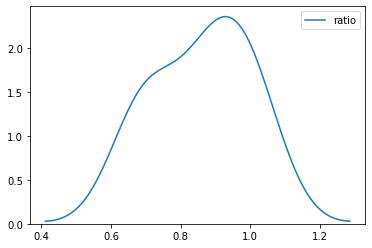

In [141]:
sns.kdeplot(gayle_ratio["ratio"])

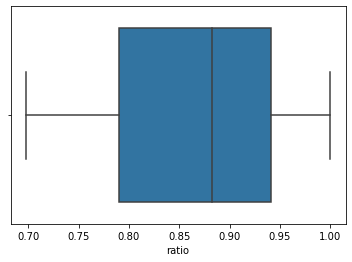

In [142]:
sns.boxplot(gayle_ratio["ratio"])

- Steven Smith

In [143]:
smith = KXIP_RR[(KXIP_RR["batting_team"]=="Rajasthan Royals")&(KXIP_RR["batsman"]=="SPD Smith")]

smith.iloc[:,4:].head()

,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
109953,Kings XI Punjab,field,0,Kings XI Punjab,1,Rajasthan Royals,Kings XI Punjab,16,5,SPD Smith,...,0,0,0,0,0,1,0,1,NaN,NaN
109955,Kings XI Punjab,field,0,Kings XI Punjab,1,Rajasthan Royals,Kings XI Punjab,17,1,SPD Smith,...,0,0,0,0,0,4,0,4,NaN,NaN
109956,Kings XI Punjab,field,0,Kings XI Punjab,1,Rajasthan Royals,Kings XI Punjab,17,2,SPD Smith,...,0,0,0,0,0,1,0,1,NaN,NaN
109961,Kings XI Punjab,field,0,Kings XI Punjab,1,Rajasthan Royals,Kings XI Punjab,18,1,SPD Smith,...,0,0,0,0,0,2,0,2,NaN,NaN
109962,Kings XI Punjab,field,0,Kings XI Punjab,1,Rajasthan Royals,Kings XI Punjab,18,2,SPD Smith,...,0,0,0,0,0,4,0,4,NaN,NaN


In [144]:
smith_runs= smith[smith["wide_runs"]==0]

batsman_runs22 = smith_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})

batsman_runs22

,batsman_runs,ball
match_id,,
464,27,15
520,33,23
536,5,3
11140,23,16


In [145]:
smith_runs.batsman_runs.unique()

array([1, 4, 2, 0, 3, 6], dtype=int64)

In [146]:
smith_boundaries = smith_runs[(smith_runs["batsman_runs"]==4)|(smith_runs["batsman_runs"]==6)]

boundary_runs22 = pd.DataFrame(smith_boundaries.groupby(["match_id"])["batsman_runs"].sum())

boundary_runs22.columns = ["boundary runs"]

boundary_runs22

,boundary runs
match_id,
464,20
520,20
536,4
11140,10


In [147]:
smith_ratio = pd.merge(batsman_runs22,boundary_runs22, on = "match_id" , how = "outer")

smith_ratio = smith_ratio[smith_ratio["ball"]>10]

smith_ratio

,batsman_runs,ball,boundary runs
match_id,,,
464,27,15,20
520,33,23,20
11140,23,16,10


In [148]:
smith_ratio["ratio"] = (smith_ratio["boundary runs"]/smith_ratio["batsman_runs"])

smith_ratio

,batsman_runs,ball,boundary runs,ratio
match_id,,,,
464,27,15,20,0.740741
520,33,23,20,0.606061
11140,23,16,10,0.434783


In [149]:
smith_final_ratio = sum(smith_ratio["ratio"]/len(smith_ratio["ratio"]))

print("Average ratio for Smith :",round(smith_final_ratio*100))

Average ratio for Smith : 59


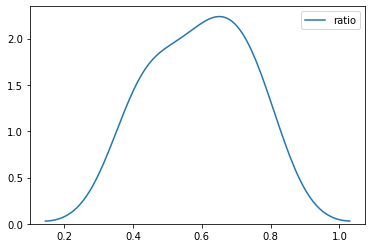

In [150]:
sns.kdeplot(smith_ratio["ratio"])

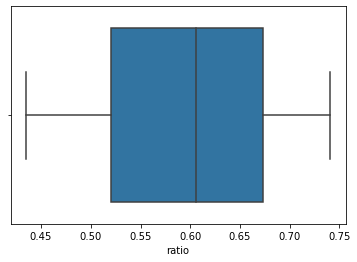

In [152]:
sns.boxplot(smith_ratio["ratio"])

From all the analysis we can predict Chris Gayle to have better ratio in this match

## OPP for players

In [292]:
def opp_batsman(player_name,opposition):
    
    player = matches[(matches["bowling_team"]==opposition)&(matches["batsman"]==player_name)]

    player_runs= player[player["wide_runs"]==0]

    batsman_runs = player_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})
    
    
    player_boundaries = player_runs[(player_runs["batsman_runs"]==4)|(player_runs["batsman_runs"]==6)]

    boundary_runs = pd.DataFrame(player_boundaries.groupby(["match_id"])["batsman_runs"].sum())

    boundary_runs.columns = ["boundary runs"]
    
    
    player_running = player_runs[(player_runs["batsman_runs"]==1)|(player_runs["batsman_runs"]==2)|(player_runs["batsman_runs"]==3)]

    batsman_running = pd.DataFrame(player_running.groupby(["match_id"])["batsman_runs"].sum())

    batsman_running.columns = ["running runs"]
    
    
    final = pd.merge(batsman_runs,boundary_runs, on = "match_id" , how = "outer")

    final = pd.merge(final,batsman_running,on="match_id",how = "outer")

    final["boundary runs"].fillna(0, inplace = True)

    final["running runs"].fillna(0, inplace = True)
    
    
    opp = ((final["batsman_runs"]/final["ball"]) + final["boundary runs"] + final["running runs"]) / final["ball"]
    
    opp_player = sum(opp)/len(opp)
#   print("Avg OPP for Player match_wise :", round(opp_player,2))
    return opp_player

In [316]:
def opp_bowler(player_name,opposition):
    
    player = matches[(matches["batting_team"] == opposition)&(matches["bowler"]==player_name)]
    
    player = player[player["wide_runs"]==0]
    
    player_bound = player[(player["batsman_runs"]==4)|(player["batsman_runs"]==6)]
    
    bound_run = pd.DataFrame(player_bound.groupby(["match_id"])["batsman_runs"].sum())
    
    bound_run.columns = ["boundary runs"]
    
    
    bound_count = pd.DataFrame(player_bound.groupby(["match_id"])["batsman_runs"].count())

    bound_count.columns = ["boundary count"]
    
    
    total_balls = pd.DataFrame(player.groupby(["match_id"])["ball"].count())
    
    
    final = pd.merge(bound_run,bound_count, on = "match_id" , how = "outer")

    final = pd.merge(final,total_balls,on="match_id",how = "outer")
 
    final["boundary runs"].fillna(0, inplace = True)

    final["boundary count"].fillna(0, inplace = True)
    
    
    opp = (final["boundary runs"]/final["boundary count"]) / final["ball"]
    
    opp.fillna(0, inplace = True)

    opp_player = sum(opp)/len(opp)
    
#    print("Avg OPP for Player match_wise :", round(opp_player,2))
    return opp_player

- Batsman

In [519]:
gayle1 = round(opp_batsman("CH Gayle","Rajasthan Royals"),2)
tewatia1 = round(opp_batsman("R Tewatia","Kings XI Punjab"),2)
rahul1 = round(opp_batsman("KL Rahul","Rajasthan Royals"),2)
stokes1 = round(opp_batsman("BA Stokes","Kings XI Punjab"),2)
mandeep1 = round(opp_batsman("Mandeep Singh","Rajasthan Royals"),2) 
pooran1 = round(opp_batsman("N Pooran","Rajasthan Royals"),2)
maxwell1 = round(opp_batsman("GJ Maxwell","Rajasthan Royals"),2)
uthappa1 = round(opp_batsman("RV Uthappa","Kings XI Punjab"),2)
samson1 = round(opp_batsman("SV Samson","Kings XI Punjab"),2)
buttler1 = round(opp_batsman("JC Buttler","Kings XI Punjab"),2)

In [520]:
batsman = [gayle1,tewatia1,rahul1,stokes1,mandeep1,pooran1,maxwell1,uthappa1,samson1,buttler1]

OPP_batsman = pd.DataFrame(batsman)

OPP_batsman.columns = ["OPP"]

OPP_batsman

,OPP
0,1.34
1,1.35
2,1.17
3,2.27
4,1.28
5,1.08
6,1.37
7,1.41
8,1.38
9,1.59


- Bowler

In [521]:
archer2 = round(opp_bowler("J Archer","Kings XI Punjab"),2)
tewatia2 = round(opp_bowler("R Tewatia","Kings XI Punjab"),2)
stokes2 = round(opp_bowler("BA Stokes","Kings XI Punjab"),2)
shami2 = round(opp_bowler("Mohammed Shami","Rajasthan Royals"),2)
maxwell2 = round(opp_bowler("GJ Maxwell","Rajasthan Royals"),2)
ashwin2 = round(opp_bowler("M Ashwin","Rajasthan Royals"),2)
gopal2 = round(opp_bowler("S Gopal","Kings XI Punjab"),2)
ankit2 = round(opp_bowler("AS Rajpoot","Kings XI Punjab"),2)

In [522]:
bowler = [archer2,tewatia2,stokes2,shami2,maxwell2,ashwin2,gopal2,ankit2]

OPP_bowler = pd.DataFrame(bowler)

OPP_bowler.columns = ["OPP"]

OPP_bowler

,OPP
0,0.20
1,0.16
2,0.23
3,0.20
4,1.00
5,0.17
6,0.17
7,0.50


#### FINAL OPP

- GAYLE

In [524]:
final_gayle = (gayle1 - min(OPP_batsman["OPP"])) / (max(OPP_batsman["OPP"]) - min(OPP_batsman["OPP"]))
print("OPP FOR GAYLE:",round(final_gayle,2))

OPP FOR GAYLE: 0.22


- Tewatia

In [525]:
final_tewatia1 = (tewatia1 - min(OPP_batsman["OPP"])) / (max(OPP_batsman["OPP"]) - min(OPP_batsman["OPP"]))
final_tewatia2 = (tewatia2 - min(OPP_bowler["OPP"])) / (max(OPP_bowler["OPP"]) - min(OPP_bowler["OPP"]))
final = final_tewatia1 + final_tewatia2

print("OPP FOR Tewatia:",round(final,2))

OPP FOR Tewatia: 0.23


- KL Rahul

In [528]:
final_rahul = (rahul1 - min(OPP_batsman["OPP"])) / (max(OPP_batsman["OPP"]) - min(OPP_batsman["OPP"]))
print("OPP FOR Rahul:",round(final_rahul,2))

OPP FOR Rahul: 0.08


- Stokes

In [529]:
final_stokes1 = (stokes1 - min(OPP_batsman["OPP"])) / (max(OPP_batsman["OPP"]) - min(OPP_batsman["OPP"]))
final_stokes2 = (stokes2 - min(OPP_bowler["OPP"])) / (max(OPP_bowler["OPP"]) - min(OPP_bowler["OPP"]))
final = final_stokes1 + final_stokes2

print("OPP FOR Tewatia:",round(final,2))

OPP FOR Tewatia: 1.08


- Mandeep

In [530]:
final_mandeep = (mandeep1 - min(OPP_batsman["OPP"])) / (max(OPP_batsman["OPP"]) - min(OPP_batsman["OPP"]))
print("OPP FOR Mandeep:",round(final_mandeep,2))

OPP FOR Mandeep: 0.17


- Pooran

In [533]:
final_pooran = (pooran1 - min(OPP_batsman["OPP"])) / (max(OPP_batsman["OPP"]) - min(OPP_batsman["OPP"]))
print("OPP FOR Pooran:",round(final_pooran,2))

OPP FOR Pooran: 0.0


- Maxwell

In [535]:
final_maxwell1 = (maxwell1 - min(OPP_batsman["OPP"])) / (max(OPP_batsman["OPP"]) - min(OPP_batsman["OPP"]))
final_maxwell2 = (maxwell2 - min(OPP_bowler["OPP"])) / (max(OPP_bowler["OPP"]) - min(OPP_bowler["OPP"]))
final = final_maxwell1 + final_maxwell2

print("OPP FOR Maxwell:",round(final,2))

OPP FOR Maxwell: 1.24


- Uthapa

In [536]:
final_uthapa = (uthappa1 - min(OPP_batsman["OPP"])) / (max(OPP_batsman["OPP"]) - min(OPP_batsman["OPP"]))
print("OPP FOR Uthapa:",round(final_uthapa,2))

OPP FOR Uthapa: 0.28


- Samson

In [537]:
final_samson = (samson1 - min(OPP_batsman["OPP"])) / (max(OPP_batsman["OPP"]) - min(OPP_batsman["OPP"]))
print("OPP FOR Samson:",round(final_samson,2))

OPP FOR Samson: 0.25


- Joss Butler

In [540]:
final_buttler = (buttler1 - min(OPP_batsman["OPP"])) / (max(OPP_batsman["OPP"]) - min(OPP_batsman["OPP"]))
print("OPP FOR Buttler:",round(final_buttler,2))

OPP FOR Buttler: 0.43


- Archer

In [542]:
final_archer = (archer2 - min(OPP_batsman["OPP"])) / (max(OPP_batsman["OPP"]) - min(OPP_batsman["OPP"]))
print("OPP FOR Archer:",round(final_archer,2))

OPP FOR Archer: -0.74


## Dot balls in entire match

In [440]:
dot_ball = KXIP_RR[KXIP_RR["total_runs"]==0]

In [448]:
dot_ball_overall = pd.DataFrame(dot_ball.groupby(["match_id"])["total_runs"].count())

dot_ball_overall.columns = ["dot balls"]

dot_ball_overall

,dot balls
match_id,
65,101
97,84
130,102
145,99
193,73
212,69
256,86
311,71
354,95


In [449]:
dot_ball_overall.describe().T

,count,mean,std,min,25%,50%,75%,max
dot balls,19.0,84.736842,12.861839,69.0,75.0,81.0,97.0,108.0


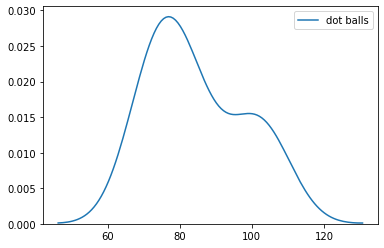

In [450]:
sns.kdeplot(dot_ball_overall["dot balls"])

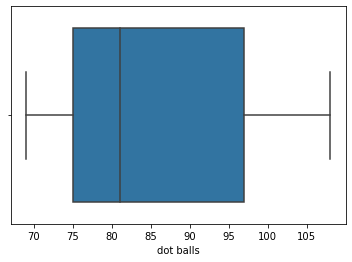

In [451]:
sns.boxplot(dot_ball_overall["dot balls"])

Text(0.5, 1.0, 'No of dot balls in KXIP VS RR')

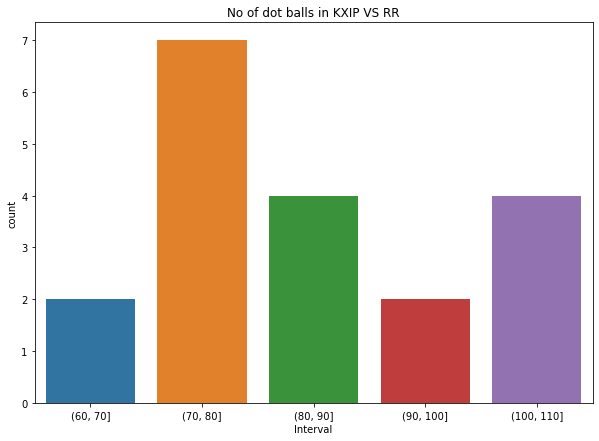

In [452]:
plt.figure(figsize=(10,7))
dot_ball_overall["Interval"] = pd.cut(dot_ball_overall["dot balls"],[60,70,80,90,100,110])
sns.countplot(dot_ball_overall["Interval"])
plt.title("No of dot balls in KXIP VS RR")

In [453]:
print("Average no of dot balls bowled in RR VS KXIP matches :{}".format(round(dot_ball_overall["dot balls"].mean())))

Average no of dot balls bowled in RR VS KXIP matches :85


### Inning Wise

- First Inning

In [454]:
first_dot = dot_ball[dot_ball["inning"]==1]

In [455]:
first_dot_ball = pd.DataFrame(first_dot.groupby(["match_id"])["total_runs"].count())

first_dot_ball.columns = ["dot balls"]

first_dot_ball

,dot balls
match_id,
65,54
97,41
130,50
145,40
193,35
212,39
256,42
311,35
354,42


In [456]:
first_dot_ball.describe().T

,count,mean,std,min,25%,50%,75%,max
dot balls,19.0,41.526316,6.104356,33.0,37.0,40.0,44.5,54.0


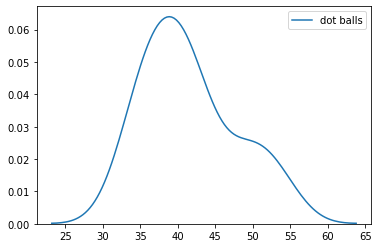

In [457]:
sns.kdeplot(first_dot_ball["dot balls"])

Text(0.5, 1.0, 'No of dot balls in 1st innings')

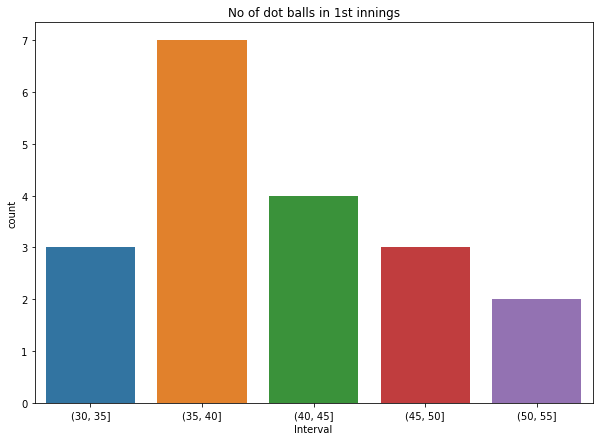

In [458]:
plt.figure(figsize=(10,7))
first_dot_ball["Interval"] = pd.cut(first_dot_ball["dot balls"],[30,35,40,45,50,55])
sns.countplot(first_dot_ball["Interval"])
plt.title("No of dot balls in 1st innings")

In [459]:
print("Average no of dot balls bowled in 1st innings :{}".format(round(first_dot_ball["dot balls"].mean())))

Average no of dot balls bowled in 1st innings :42


- 2nd innings

In [460]:
second_dot = dot_ball[dot_ball["inning"]==2]

In [461]:
second_dot_ball = pd.DataFrame(second_dot.groupby(["match_id"])["total_runs"].count())

second_dot_ball.columns = ["dot balls"]

second_dot_ball

,dot balls
match_id,
65,47
97,43
130,52
145,59
193,38
212,30
256,44
311,36
354,53


In [462]:
second_dot_ball.describe().T

,count,mean,std,min,25%,50%,75%,max
dot balls,19.0,43.0,8.962886,29.0,37.0,42.0,49.5,59.0


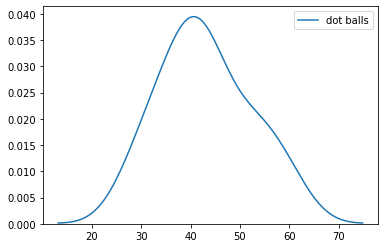

In [463]:
sns.kdeplot(second_dot_ball["dot balls"])

Text(0.5, 1.0, 'No of dot balls in 2nd innings')

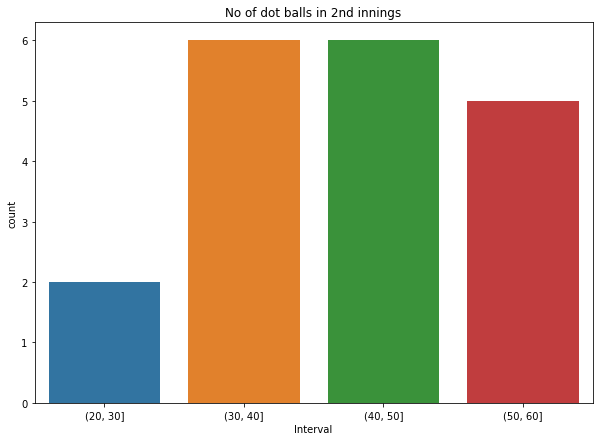

In [465]:
plt.figure(figsize=(10,7))
second_dot_ball["Interval"] = pd.cut(second_dot_ball["dot balls"],[20,30,40,50,60])
sns.countplot(second_dot_ball["Interval"])
plt.title("No of dot balls in 2nd innings")

In [466]:
print("Average no of dot balls bowled in 2nd innings :{}".format(round(second_dot_ball["dot balls"].mean())))

Average no of dot balls bowled in 2nd innings :43


### Confidence Interval

In [467]:
mean = dot_ball_overall["dot balls"].mean()
sd = dot_ball_overall["dot balls"].std()
n = len(dot_ball_overall["dot balls"])

n

19

In [468]:
tstar = 2.064
se = sd/np.sqrt(n)
se

2.9507082163689313

In [469]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)


print("95% Confidence Interval for the dot balls than can be bowled in RR VS KXIP match :{}".format((lcb, ucb)))

95% Confidence Interval for the dot balls than can be bowled in RR VS KXIP match :(79.0, 91.0)


From all the above analysis we can prdict dot balls to be between 60-90

## Balls Shami will take for his first wicket

In [484]:
shami = matches[matches["bowler"]=="Mohammed Shami"]
shami = shami[(shami["wide_runs"]==0)&(shami["noball_runs"]==0)]
shami = shami[shami["dismissal_kind"]!="run out"]

In [485]:
shami_dismissal = shami.groupby(["match_id"]).agg({"ball":"count","player_dismissed":"count"})

shami_dismissal.columns = ["total ball","wicket taken"]

shami_dismissal = shami_dismissal[shami_dismissal["wicket taken"]>0]

print("Shami's Performance :")
shami_dismissal

Shami's Performance :


,total ball,wicket taken
match_id,,
39,24,2
49,23,1
51,24,2
453,24,1
459,24,1
463,24,1
465,23,1
480,24,1
495,24,1


In [486]:
batsman = shami.batsman.unique()
ball =[]
f = []
for value in shami.groupby("match_id"):
    count = 0
    d = list(value[1]["player_dismissed"])
    f = list(value[1]["match_id"].unique())
    for i in d:
        count = count+1
        if(i in batsman):
            ball.append(count)
            break
ball

[2,
 20,
 16,
 23,
 5,
 1,
 14,
 24,
 15,
 24,
 8,
 14,
 15,
 13,
 14,
 22,
 21,
 5,
 10,
 18,
 16,
 19,
 10,
 15,
 13,
 21,
 7,
 20,
 17,
 14]

In [487]:
shami_dismissal["balls for 1st wicket"] = ball

shami_dismissal

,total ball,wicket taken,balls for 1st wicket
match_id,,,
39,24,2,2
49,23,1,20
51,24,2,16
453,24,1,23
459,24,1,5
463,24,1,1
465,23,1,14
480,24,1,24
495,24,1,15


In [488]:
shami_dismissal.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
balls for 1st wicket,30.0,14.533333,6.328552,1.0,10.75,15.0,19.75,24.0


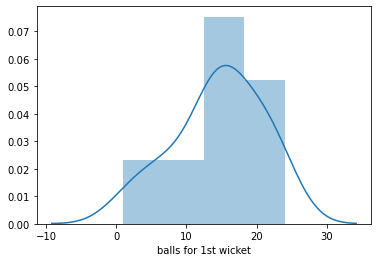

In [489]:
sns.distplot(shami_dismissal["balls for 1st wicket"])

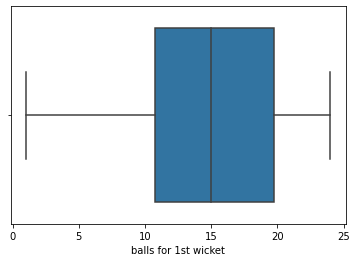

In [490]:
sns.boxplot(shami_dismissal["balls for 1st wicket"])

In [491]:
print("Average no. of balls taken by Shami for his first wicket :{}".format(round(shami_dismissal["balls for 1st wicket"].mean())))

Average no. of balls taken by Shami for his first wicket :15


Text(0.5, 1.0, 'Balls for 1st wicket')

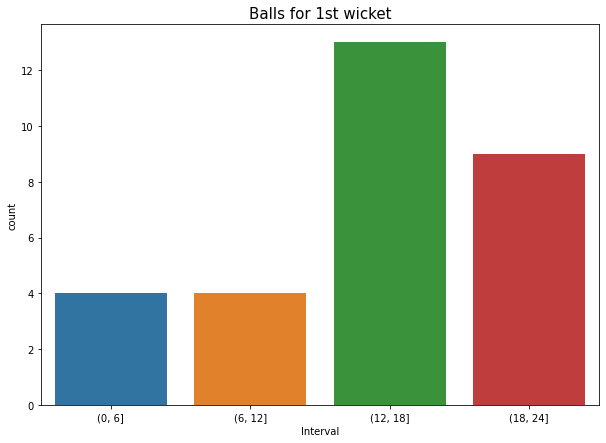

In [492]:
plt.figure(figsize=(10,7))
shami_dismissal["Interval"] = pd.cut(shami_dismissal["balls for 1st wicket"],[0,6,12,18,24])
sns.countplot(shami_dismissal["Interval"])
plt.title("Balls for 1st wicket",fontsize = 15)

From all the above analysis we can predict Shami to take 12 -18 balls for his first wicket